In [2]:
# 회귀(regression) - 예측

In [3]:
# KNN 
# - 최근접 이웃 분류
# - 최근접 이웃 회귀: 근접 이웃의 평균

In [4]:
from sklearn import svm,metrics
from sklearn.neighbors import KNeighborsClassifier # 분류
from sklearn.neighbors import KNeighborsRegressor   # 회귀 - 예측
from sklearn.model_selection import train_test_split 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

matplotlib.rcParams['font.family'] = 'Malgun Gothic' # 한글 설정
matplotlib.rcParams['font.size'] = 10 #글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False

In [28]:
perch_length = [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
perch_weight = [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
df = pd.DataFrame([perch_length, perch_weight])
df = df.T
df

,0,1
0,8.4,5.9
1,13.7,32.0
2,15.0,40.0
3,16.2,51.5
4,17.4,70.0
5,18.0,100.0
6,18.7,78.0
7,19.0,80.0
8,19.6,85.0
9,20.0,85.0


In [27]:
# numpy 구조로 변환
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

Text(0, 0.5, '무게')

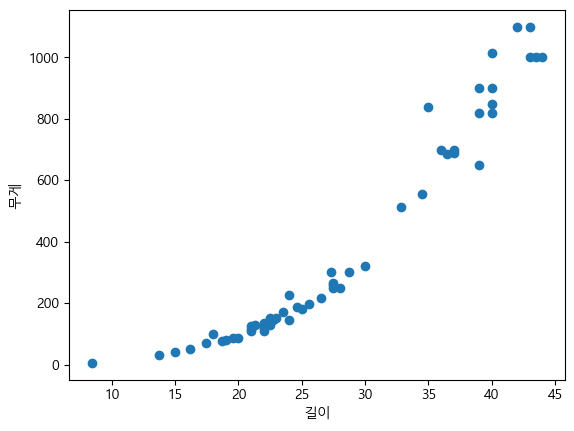

In [7]:
# 산점도로 출력
# x축은 길이, y축은 무게
x= perch_length
y = perch_weight
plt.scatter(x,y)
plt.xlabel('길이')
plt.ylabel('무게')

 머신러닝 구현
 1. 데이터 전처리 - Nan, 0, 단위 처리, train_set, test_set 분리
 2. 데이터 학습
 3. 데이터 예측
 4. 예측값 구하기 (오차 범위)

In [8]:
# 머신러닝 구현
# 1. 데이터 전처리 - Nan, 0, 단위 처리, train_set, test_set 분리
train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight)

train_input

array([15. , 22. , 19. , 39. , 22. , 25.6, 27.5, 22.5, 23. , 40. , 35. ,
       36. , 21. , 43.5, 40. , 24. , 22.7, 27.3, 39. , 27.5, 30. , 42. ,
       44. , 32.8, 25. , 18.7, 21. , 28.7, 24.6, 22. , 27.5, 20. , 13.7,
       26.5, 37. , 34.5, 39. , 43. , 28. , 18. ,  8.4, 43. ])

In [9]:
# 총 갯수: 56
train_input.shape #42
test_input.shape #14

(14,)

In [10]:
arr1 = np.array([1,2,3,4,5,6]) # numpy 행렬로 변환
arr1.reshape(6,1) # = arr1.reshape(-1,1) # 행렬의 모양 변경

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6]])

In [11]:
# [1,2,3,4] --> [[1],[2],[3],[4]]

arr1 = np.array([1,2,3,4])
arr1 = arr1.reshape(-1,1)
arr1

array([[1],
       [2],
       [3],
       [4]])

In [30]:
# 알고리즘 구현 위한 2차원 행렬로 변경.
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [33]:
# 데이터 학습
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [14]:
# 예측의 오차 범위 - 평균의 절대값 오차 
from sklearn.metrics import mean_absolute_error
predict = knr.predict(test_input)
print("예측값: ",predict)

예측값:  [135.  132.  824.   76.6 161.6 737.2 122.  756.  824.  132.  122.  151.6
  66.   93.6]


In [15]:
perch_weight

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [16]:
# 예측값과 실제값의 평균 절대값 오차
test_mean = mean_absolute_error(test_target,predict)
print("오차 범위: ",test_mean)

오차 범위:  33.90714285714286


In [17]:
# 예측률 측정 - test_input 데이터 검증
score = knr.score(test_input, test_target)
print("예측률: ",score)

예측률:  0.9661965468846927


In [18]:
# 실제 train 데이터의 예측률 확인
score2 = knr.score(train_input,train_target)
score2

0.9758975263367965

KNN 회귀 분석 통해 농어에 대한 무게 예측 프로그램 구현

그래프 구성

In [19]:
# 이웃의 개수 축소: 5-->3
# 과소적합은 n_neighbors를 줄여 부분 문제 해결
# 과대적합은 n_neighbors를 늘여 부분 문제 해결
knr.n_neighbors = 3

# 데이터 훈련 다시 시키기
knr.fit(train_input,train_target)

# train 데이터 예측
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))


0.9788546804246883
0.9768868479032199


In [20]:
knr.score(test_input,test_target)

0.9768868479032199

In [21]:
perch_length

array([ 8.4, 13.7, 15. , 16.2, 17.4, 18. , 18.7, 19. , 19.6, 20. , 21. ,
       21. , 21. , 21.3, 22. , 22. , 22. , 22. , 22. , 22.5, 22.5, 22.7,
       23. , 23.5, 24. , 24. , 24.6, 25. , 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28. , 28.7, 30. , 32.8, 34.5, 35. , 36.5, 36. , 37. , 37. ,
       39. , 39. , 39. , 40. , 40. , 40. , 40. , 42. , 43. , 43. , 43.5,
       44. ])

In [22]:
arr = [[i] for i in range(5,45+1)] # x축의 좌표
arr

[[5],
 [6],
 [7],
 [8],
 [9],
 [10],
 [11],
 [12],
 [13],
 [14],
 [15],
 [16],
 [17],
 [18],
 [19],
 [20],
 [21],
 [22],
 [23],
 [24],
 [25],
 [26],
 [27],
 [28],
 [29],
 [30],
 [31],
 [32],
 [33],
 [34],
 [35],
 [36],
 [37],
 [38],
 [39],
 [40],
 [41],
 [42],
 [43],
 [44],
 [45]]

In [23]:
np.arange(4,45)

array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
       38, 39, 40, 41, 42, 43, 44])

In [24]:
np.arange(5,45).reshape


<function ndarray.reshape>

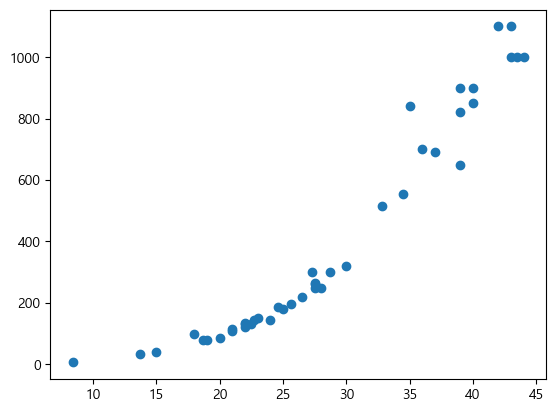

In [25]:
plt.scatter(train_input,train_target)

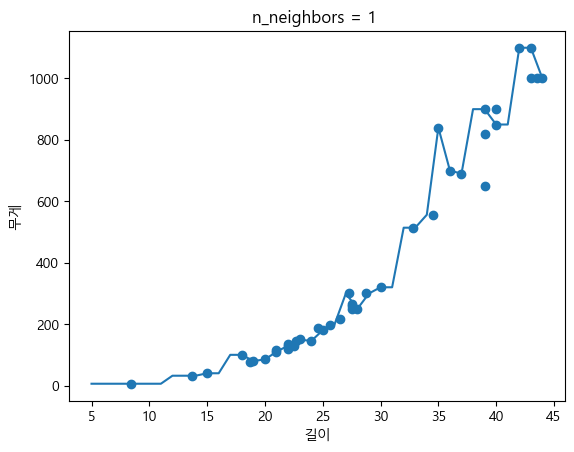

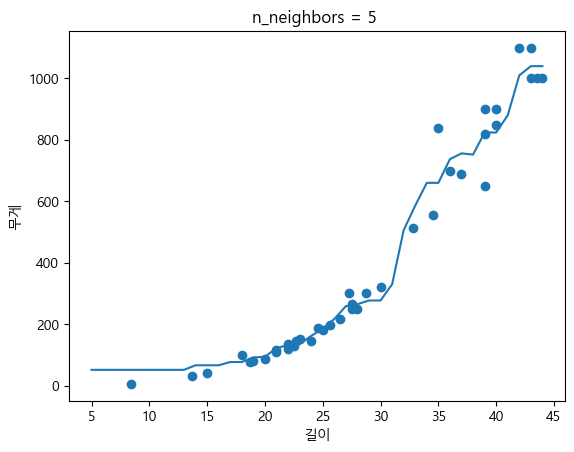

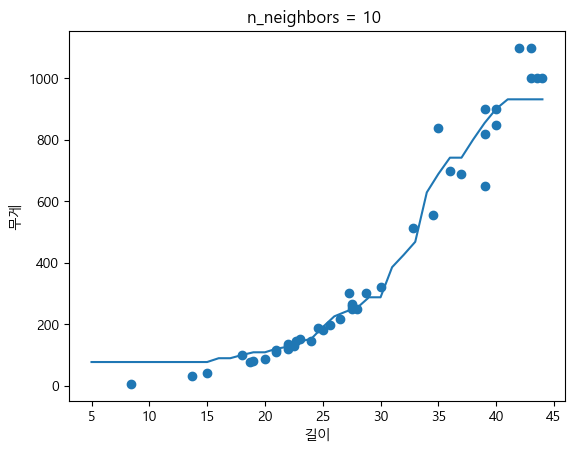

In [36]:
knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)
for n in [1,5,10]: #n_neighbors = 1,5,10 예측률을 그래프로 실시
    knr.n_neighbors = n
    # 데이터 다시 훈련
    knr.fit(train_input,train_target)
    
    # 배열로 만든 길이를 가지고 예측무게 산출
    predict = knr.predict(x)
    
    # 훈련 세트의 값 먼저 출력
    plt.scatter(train_input,train_target)
    plt.plot(x,predict)
    plt.title("n_neighbors = {} ".format(n))
    plt.xlabel('길이')
    plt.ylabel('무게')
    plt.show()